# Inspecting internals
This example assumes you've read `advanced.ipynb`, and covers:

   - Inspecting useful internal `TrainGenerator` & `DataGenerator` attributes
   - Inspecting train / validation interruptions

In [2]:
import deeptrain
deeptrain.append_examples_dir_to_sys_path()  # for `from utils import`

from utils import make_autoencoder, init_session
from utils import AE_CONFIGS as C

### Configure & train

Discovered 50 files with matching format
50 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
Discovered 36 files with matching format
36 set nums inferred; if more are expected, ensure file names contain a common substring w/ a number (e.g. 'train1.npy', 'train2.npy', etc)
DataGenerator initiated
NOTE: will exclude `labels` from saving when `input_as_labels=True`; to keep 'labels', add '{labels}'to `saveskip_list` instead
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 50 files with matching format
.................................................. finished, w/ 6400 total samples
Train initial data prepared
Preloading superbatch ... WARNING: multiple file extensions found in `path`; only .npy will be used 
Discovered 36 files with matching format
.................................... finished, w/ 4608 total sample

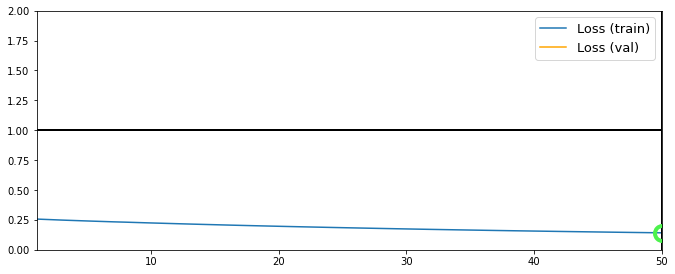

Training has concluded.


In [3]:
C['traingen']['epochs'] = 1  # don't need more
C['traingen']['iter_verbosity'] = 0  # don't need progress printing here
tg = init_session(C, make_autoencoder)
dg = tg.datagen
vdg = tg.val_datagen

tg.train()

### Arguments passed to TrainGenerator
Some objects are stored as string to allow pickling

In [6]:
from pprint import pprint
pprint(tg._passed_args)

{'best_models_dir': 'C:\\Users\\OverL\\Desktop\\School\\Deep '
                    'Learning\\DL_Code\\dev_tg\\examples\\dir\\outputs\\models',
 'datagen': 'DataGenerator',
 'epochs': 1,
 'eval_fn': 'predict',
 'input_as_labels': True,
 'iter_verbosity': 0,
 'logs_dir': 'C:\\Users\\OverL\\Desktop\\School\\Deep '
             'Learning\\DL_Code\\dev_tg\\examples\\dir\\outputs\\logs',
 'max_is_best': False,
 'model': 'Model',
 'model_configs': {'activation': ['relu', 'relu', 'relu', 'relu', 'relu'],
                   'batch_shape': (128, 28, 28, 1),
                   'filters': [6, 12, 2, 6, 12],
                   'input_dropout': 0.5,
                   'kernel_size': [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)],
                   'loss': 'mse',
                   'metrics': None,
                   'optimizer': 'nadam',
                   'preout_dropout': 0.4,
                   'strides': [(2, 2), (2, 2), 1, 1, 1],
                   'up_sampling_2d': [None, None, None, (2, 2), (2, 2

### Methods & attributes (general)
Can be inspected with `vars` & `dir`

In [7]:
def show_attributes(obj):
    _ = [print(a) for a in vars(obj)]

def show_methods(obj):  # not foolproof, may include non-methods
    _ = [print(a) for a in dir(obj)
         if (a not in vars(obj)  # `vars` subsets `dir` and has no methods
             and "__%s__" % a.strip('__') != a)]  # exclude magic methods

In [8]:
show_attributes(tg)

model
datagen
val_datagen
epochs
logs_dir
best_models_dir
loadpath
callbacks
key_metric
key_metric_fn
train_metrics
val_metrics
custom_metrics
input_as_labels
max_is_best
val_freq
plot_history_freq
unique_checkpoint_freq
temp_checkpoint_freq
class_weights
val_class_weights
reset_statefuls
iter_verbosity
logdir
optimizer_save_configs
optimizer_load_configs
plot_configs
model_configs
batch_size
_fit_fn
_fit_fn_name
_fit_fn_args
_eval_fn
_eval_fn_name
_eval_fn_args
_passed_args
dynamic_predict_threshold_min_max
checkpoints_overwrite_duplicates
loss_weighted_slices_range
pred_weighted_slices_range
logs_use_full_model_name
new_model_num
dynamic_predict_threshold
plot_first_pane_max_vals
_val_max_set_name_chars
_max_set_name_chars
predict_threshold
best_subset_size
check_model_health
max_one_best_save
max_checkpoints
report_fontpath
model_base_name
final_fig_dir
loadskip_list
saveskip_list
model_save_kw
model_save_weights_kw
metric_to_alias
alias_to_metric
report_configs
model_name_configs
n

In [9]:
show_methods(tg)

_alias_to_metric_name
_apply_callbacks
_attr_fn_setter
_compute_metric
_compute_metrics
_gather_over_dataset
_get_best_subset_val_history
_get_optimizer_state
_get_train_history
_get_val_history
_get_weighted_sample_weight
_init_and_validate_kwargs
_init_callbacks
_init_class_vars
_init_logger
_load_optimizer_state
_make_model_save_fns
_make_plot_configs_from_metrics
_metric_name_to_alias
_on_val_end
_prepare_initial_data
_print_iter_progress
_print_progress
_print_train_progress
_print_val_progress
_save_best_model
_save_history_fig
_set_predict_threshold
_should_do
_train_postiter_processing
_transform_eval_data
_update_temp_history
_update_train_history
_update_val_history
_update_val_iter_cache
_val_postiter_processing
_validate_class_data_shapes
_validate_data_shapes
_validate_traingen_configs
_weighted_normalize_preds
check_health
checkpoint
clear_cache
compute_gradient_norm
destroy
epoch
eval_fn
fit_fn
generate_report
get_data
get_history_fig
get_last_log
get_sample_weight
get_u

In [10]:
show_attributes(dg)

data_path
batch_size
labels_path
preprocessor
preprocessor_configs
preload_labels
shuffle
superbatch_path
shuffle_group_batches
shuffle_group_samples
data_batch_shape
labels_batch_shape
data_dtype
labels_dtype
loadskip_list
saveskip_list
data_loader
labels_loader
set_nums_original
set_nums_to_process
superbatch_set_nums
all_data_exhausted
epoch
set_num
set_name
_set_names
start_increment
_path_attrs
_superbatch_base_name
_superbatch_ext
_superbatch_filepaths
batch
superbatch
labels
all_labels
_group_batch
_group_labels


In [11]:
show_methods(dg)

_BUILTINS
_batch_from_group_batch
_get_next_batch
_get_next_labels
_infer_and_set_info
_infer_info
_init_and_validate_kwargs
_init_class_vars
_labels_from_group_labels
_make_group_batch_and_labels
_set_preprocessor
_set_set_nums
_update_group_batch_state
_validate_batch
advance_batch
batch_exhausted
batch_loaded
get
load_data
load_labels
on_epoch_end
preload_all_labels
preload_superbatch
reset_state
slice_idx
slices_per_batch
update_state


### Save directories

In [12]:
print("Best model directory:", tg.best_models_dir)
print("Checkpoint directory:", tg.logdir)
print("Model full name:", tg.model_name)

Best model directory: C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models
Checkpoint directory: C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\logs\M43__model-nadam__min999.000
Model full name: M43__model-nadam__min.142


### Interrupts
Interrupts can be inspected by checking pertinent attributes manually<br>
`(_train_loop_done, _train_postiter_processed, _val_loop_done, _val_postiter_processed)`,<br>
or calling `interrupt_status()` which checks these and prints an appropriate message.

In [13]:
tg.interrupt_status()

No interrupts detected.

Flags checked:
	_train_loop_done          = False
	_train_postiter_processed = True
	_val_loop_done            = False
	_val_postiter_processed   = True


(False, False)

Interrupts can be manual (`KeyboardInterrupt`) or due to a `raise Exception`; either interrupts the flow of train/validation, so knowing at which point the fault occurred allows us to correct manually (e.g. execute portion of
code after an exception)

### Interrupt example

In [14]:
tg._train_loop_done = True
tg._val_loop_done = True
tg._val_postiter_processed = True

At this point `_on_val_end()` is called automatically, so if you're able to access such a state, it means the call didn't finish or was never initiated.

In [15]:
tg.interrupt_status()

Incomplete or not called `_on_val_end()` within `validate()`.
Interrupted: train[no], validation[yes].

Flags checked:
	_train_loop_done          = True
	_train_postiter_processed = True
	_val_loop_done            = True
	_val_postiter_processed   = True


(False, True)

### Example 2

In [16]:
tg._val_loop_done = False
tg._val_postiter_processed = False
tg.interrupt_status()

Interrupted during validation loop within `validate()`; incomplete or not called `_val_postiter_processing()`.
Interrupted: train[no], validation[yes].

Flags checked:
	_train_loop_done          = True
	_train_postiter_processed = True
	_val_loop_done            = False
	_val_postiter_processed   = False


(False, True)

In [18]:
help(tg.train)

Help on method train in module deeptrain.train_generator:

train() method of deeptrain.train_generator.TrainGenerator instance
    The train loop.
    
        - Fetches data from `get_data`
        - Fits data via `fin_fn`
        - Processes fit metrics in `_train_postiter_processing`
        - Stores metrics in `history`
        - Applies `'train:iter'`, `'train:batch'`, and `'train:epoch'`
          callbacks
        - Calls `validate` when appropriate
    
    **Interruption**:
    
        - *Safe*: during `get_data`, which can be called indefinitely
          without changing any attributes.
        - *Avoid*: during `_train_postiter_processing`, where `fit_fn` is
          applied and weights are updated - but metrics aren't stored, and
          `_train_postiter_processed=False`, restarting the loop without
          recording progress.
        - Best bet is during :meth:`validate`, as `get_data` may be too brief.



In [19]:
help(tg.validate)

Help on method validate in module deeptrain.train_generator:

validate(record_progress=True, clear_cache=True, restart=False, use_callbacks=True) method of deeptrain.train_generator.TrainGenerator instance
    Validation loop.
    
        - Fetches data from `get_data`
        - Applies function based on `eval_fn_name`
        - Processes and caches metrics/predictions in
          `_val_postiter_processing`
        - Applies `'val:iter'`, `'val:batch'`, and `'val:epoch'` callbacks
        - Calls `_on_val_end` at end of validation to compute metrics
          and store them in `val_history`
        - Applies `'val_end'` and maybe `('val_end': 'train:epoch')` callbacks
        - If `restart`, calls :meth:`reset_validation`.
    
    **Arguments**:
        record_progress: bool
            If False, won't update `val_history`, `_val_iters`,
            `_batches_validated`.
        clear_cache: bool
            If False, won't call :meth:`clear_cache`; useful for keeping
            pr

Interrupts can also be inspected by checking `temp_history`, `val_temp_history`, and cache attributes (e.g. `_preds_cache`); <br> cache attributes clear by default when `validate()` finishes.<br> Check `help(train)` and `help(validate)` for further interrupt guidelines.

### DataGenerator attributes

In [20]:
# We can check which set numbers remain to be processed in epoch or validation:
print(dg.set_nums_to_process)
print(vdg.set_nums_to_process)
# We can arbitrarily append to or pop from the list to skip or repeat a batch

['8', '7', '31', '14', '28', '10', '37', '38', '19', '15', '33', '29', '49', '32', '16', '1', '30', '47', '34', '36', '21', '20', '23', '50', '3', '2', '39', '41', '48', '24', '9', '42', '27', '22', '44', '4', '18', '40', '26', '11', '6', '17', '12', '5', '35', '25', '45', '13', '46', '43']
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36']


### Info function
Lastly, we can access most of the above via `info()`:

In [21]:
tg.info()

Epochs: 1/1
Train batches fit: 0/50 (in current epoch)
Val   batches fit: 0/36 (in current validation)
--------------------------------------------------------------------------------
Best model directory: C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\models
Checkpoint directory: C:\Users\OverL\Desktop\School\Deep Learning\DL_Code\dev_tg\examples\dir\outputs\logs\M43__model-nadam__min999.000
Load path: None
Model full name: M43__model-nadam__min.142
--------------------------------------------------------------------------------
Interrupted during validation loop within `validate()`; incomplete or not called `_val_postiter_processing()`.
Interrupted: train[no], validation[yes].

Flags checked:
	_train_loop_done          = True
	_train_postiter_processed = True
	_val_loop_done            = False
	_val_postiter_processed   = False
